### Question # 9

Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary
classifiers, you will need to use one-versus-the-rest to classify all 10 digits. You
may want to tune the hyperparameters using small validation sets to speed up the
process. What accuracy can you reach?

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:74: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


MemoryError: 

In [ ]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [ ]:
X = mnist['data']
y=mnist['target']

In [ ]:
def draw_image(index):
    some_image = X.iloc[index, :].to_numpy().reshape(28,28)
    plt.imshow(some_image, cmap='binary')
    plt.axis('off')
    print("The following image is classified as: ", y[index])

The following image is classified as:  2


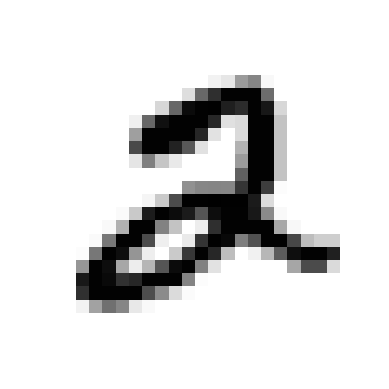

In [ ]:
draw_image(5)

The following image is classified as:  0


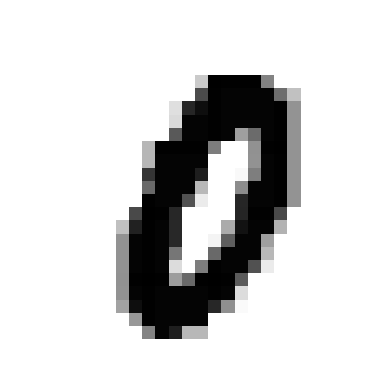

In [ ]:
draw_image(34)

##### Adding more features for more accuracy

In [ ]:
X

array([[-2.50328585, -3.1382643 ],
       [-2.35231146, -1.47697014],
       [-3.23415337, -3.23413696],
       [-1.42078718, -2.23256527],
       [-3.46947439, -2.45743996],
       [-3.46341769, -3.46572975],
       [-2.75803773, -4.91328024],
       [-4.72491783, -3.56228753],
       [-4.01283112, -2.68575267],
       [-3.90802408, -4.4123037 ],
       [-1.53435123, -3.2257763 ],
       [-2.9324718 , -4.42474819],
       [-3.54438272, -2.88907741],
       [-4.15099358, -2.62430198],
       [-3.60063869, -3.29169375],
       [-3.60170661, -1.14772182],
       [-3.01349722, -4.05771093],
       [-2.17745509, -4.22084365],
       [-2.7911364 , -4.95967012],
       [-4.32818605, -2.80313876],
       [-2.26153342, -2.82863172],
       [-3.11564828, -3.3011037 ],
       [-4.47852199, -3.71984421],
       [-3.46063877, -1.94287777],
       [-2.65638171, -4.76304016],
       [-2.67591603, -3.38508228],
       [-3.676922  , -2.38832371],
       [-1.96900048, -2.06871988],
       [-3.83921752,

In [ ]:
from scipy.ndimage import shift
X_aug =[]
y_aug =[]
for dir in ['left','right', 'up', 'down']:
    for i in range(len(X_numpy)):
        img = X.iloc[i].to_numpy().reshape(28,28) 
        label = y.iloc[i]
        if dir.lower() == 'left':
            shifted = shift(img,[0,-1],cval = 0)
        elif dir.lower() == 'right':
            shifted = shift(img,[0,1],cval = 0)
        elif dir.lower() == 'up':
            shifted = shift(img,[-1,0],cval = 0)
        elif dir.lower() == 'down':
            shifted = shift(img,[-1,0],cval = 0)
        X_aug.append(shifted.flatten())
        y_aug.append(label)

NameError: name 'X_numpy' is not defined

In [ ]:
X = np.concat([X,X_aug],axis = 0)
y = np.concat([y,y_aug], axis = 0)

MemoryError: Unable to allocate 1.64 GiB for an array with shape (280000, 784) and data type int64

In [ ]:
print("Original shape:", X.shape)
print("Augmented shape:", np.array(X_aug).shape)

Original shape: (350000, 784)
Augmented shape: (280000, 784)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

MemoryError: Unable to allocate 1.64 GiB for an array with shape (280000, 784) and data type int64

##### Training the model


In [ ]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="hinge")  # hinge = linear SVM
clf.fit(X_train, y_train)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [ ]:
y_pred = clf.predict(X_test)

array(['3', '3', '3', ..., '3', '3', '3'], shape=(70000,), dtype='<U1')

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: ", accuracy_score(y_test,y_pred))

Accuracy Score:  0.09971428571428571
